# Obesity Levels 

### Our Motivation 
The "Obesity Levels" dataset has captured our interest because obesity is a major public health issue with significant consequences. By examining this dataset, we hope to uncover the key factors contributing to obesity and leverage machine learning models to enhance our ability to classify and predict obesity levels. Understanding these factors will empower individuals and healthcare professionals to create more effective prevention strategies, ultimately reducing obesity rates and improving public health outcomes. 

### Our Goal 
Our goal is to create a machine-learning model that predicts individual obesity levels using both classification and clustering techniques. The classification approach will enable us to train the model to differentiate between individuals with different obesity levels based on a variety of health, dietary, and lifestyle factors. Clustering, on the other hand, will help identify hidden patterns in the dataset by grouping individuals with similar obesity risk profiles. These clusters will then assist in predicting obesity levels for new individuals by analyzing their resemblance to existing groups.

In [308]:
import pandas as pd
df = pd.read_csv('Dataset/ObesityDataSet_raw_and_data_sinthetic.csv')
filtered_df =pd.read_csv('Dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

##### source of dataset : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### General Information About The Dataset
- Dataset include 17 attributes and 2111 records.
- There is 8 attributes of type float and the other 9 of type object. 
- Class label : NObeyesdad ( type of obesity ).
- There are no missing values.

#### Clarifying Attributes' Shortcuts
- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
-  CAEC : Feature, Categorical, " Do you eat any food between meals? "
-  CH2O: Feature, Continuous, " How much water do you drink daily? "
-  SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
-  FAF: Feature, Continuous, " How often do you have physical activity? "
-  TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
-  CALC : Feature, Categorical, " How often do you drink alcohol? "
-  MTRANS : Feature, Categorical, " Which transportation do you usually use? "
-  NObeyesdad : Target, Categorical, "Obesity level"


### Data Summarization

In [316]:
import seaborn as sns 
import matplotlib.pyplot as plt


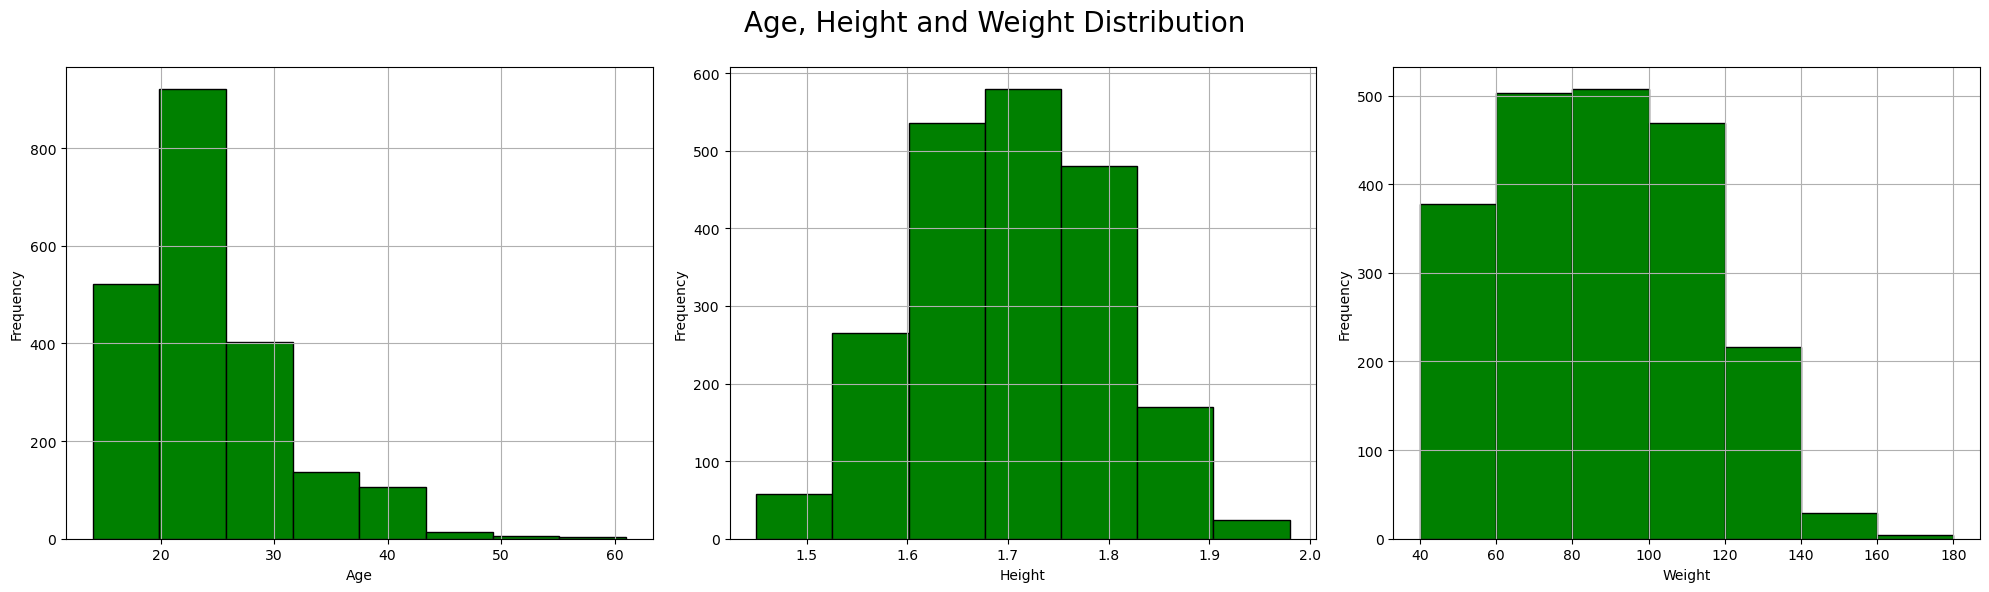

In [318]:
#subplot includes histograms of Age, Height and Weight
plt.figure(figsize=(20,6))
plt.suptitle('Age, Height and Weight Distribution', fontsize=20)

#first chart
plt.subplot(1,3,1)
df["Age"].hist(color='green' ,bins=8 ,edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")

#second chart
plt.subplot(1,3,2)
df["Height"].hist(color='green' ,bins=7,edgecolor='black')
plt.xlabel("Height")
plt.ylabel("Frequency")

#third chart
plt.subplot(1,3,3)
Weight_bins=[40, 60,80,100,120,140,160,180]
df["Weight"].hist(color='green' , bins=Weight_bins,edgecolor='black')
plt.xticks(Weight_bins)
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

### Summery of Graphs
Histograms are a powerful tool for visualizing the distribution of continuous numerical data. With the most important continuous variables in our dataset, Age, Height, and Weight.

##### 1. Age Histogram (Leftmost Plot):
- <b>Shape:</b>  The distribution is right-skewed (positively skewed).
- <b>Peak:</b> The highest frequency of individuals falls within the 20 to 25 age range.
- <b>Spread:</b> This shows that the population is largely concentrated among younger individuals, especially in their 20s and 30s.

##### 2. Height Histogram (Middle Plot):
- <b>Shape:</b> The distribution appears close to normal (bell-shaped).
- <b>Peak:</b> The most frequent height is around 1.7 meters.
- <b>Spread:</b> The heights generally range between 1.60 meters and 1.82 meters, with less individuals below or above this range.
- <b>Observation:</b> The height distribution is centered around an average height, with a symmetrical spread on both sides, indicating a typical height distribution for a population.

##### 3. Weight Histogram (Rightmost Plot):
- <b>Shape:</b> The weight distribution is slightly skewed to the right.
- <b>Peak:</b> The most frequent weights are between 60 and 120 kg.
- <b>Spread:</b> The majority of individuals weigh between 40 and 140 kg, with a significant drop in frequency for weights above 140 kg.

Text(0.5, 1.0, 'Correlation heatmap')

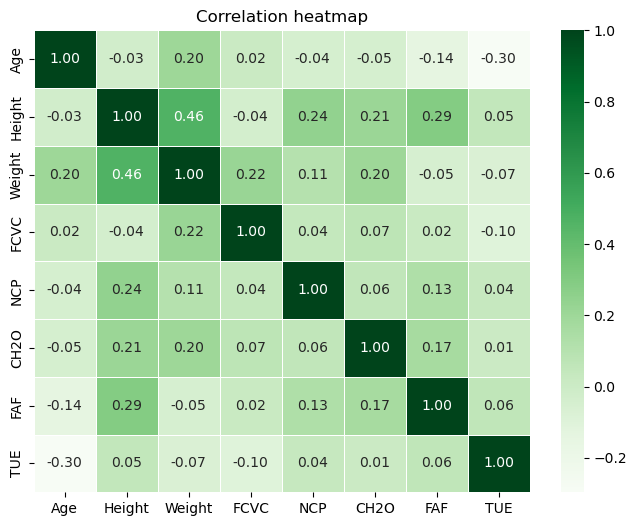

In [321]:
selected_columns = df [['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O' , 'FAF' , 'TUE']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='Greens',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

The heatmap provides a quick visual summary of relationships, helping us identify highly correlated variables, either positively or negatively .
#### Correlation meanings :
- if the number is close to 1 , that means it has a Positive Strong Correlation
- if the number is between 0.3 and 0.7 , that means it has Moderate Correlation
- if the number is close to zero , that means it has Weak or No Correlation
- if the number is close to -1 , that means it has a Negative Strong Correlation

Most of our attributes has no correlation since they are mostly close to zero , and few has a Moderate Correlation such as ( weight and height ) there is a noticeable but not exceptionally strong linear relationship between a person's height and their weight .

### Missing Values

In [326]:
missing_values=df.isna().sum()
print('\033[1mMissing Values in each column:\033[0m')  
print(missing_values,'\n')
print('\033[1mTotal Nmber of Missing Nalues in Dataset:\033[0m')
print(missing_values.sum())
   

Missing Values in each column:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64 

Total Nmber of Missing Nalues in Dataset:
0


In [328]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

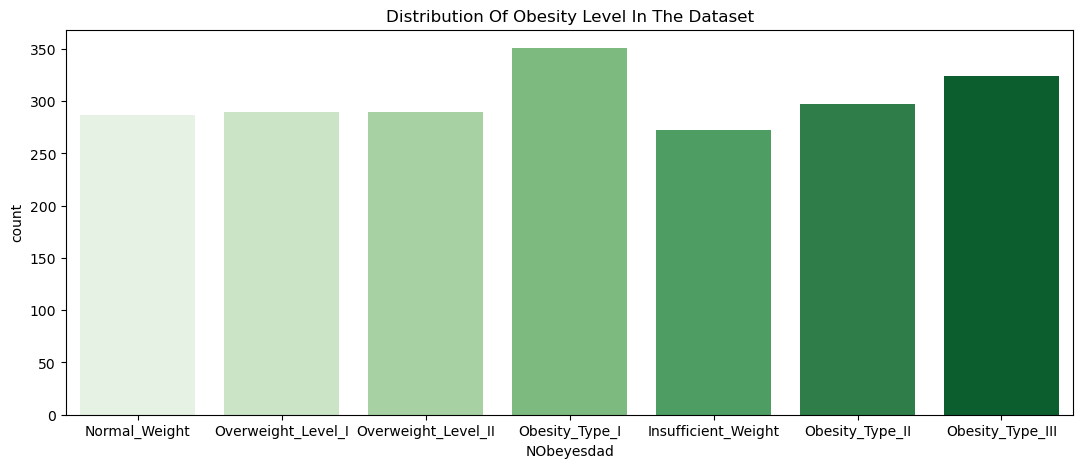

In [330]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

### Data Preprocessing

In [333]:

AgeQ1 = df['Age'].quantile(0.25)
AgeQ3 = df['Age'].quantile(0.75)

AIQR = AgeQ3 - AgeQ1

Alower_bound = AgeQ1 - 1.5 * AIQR
Aupper_bound = AgeQ3 + 1.5 * AIQR # For Age 

WQ1 = df['Weight'].quantile(0.25)
WQ3 = df['Weight'].quantile(0.75)

WIQR = WQ3 - WQ1

Wlower_bound = WQ1 - 1.5 * WIQR
Wupper_bound = WQ3 + 1.5 * WIQR # For Weight 

HQ1 = df['Height'].quantile(0.25)
HQ3 = df['Height'].quantile(0.75)

HIQR = HQ3 - HQ1

Hlower_bound = HQ1 - 1.5 * HIQR
Hupper_bound = HQ3 + 1.5 * HIQR # For Age 

filtered_df = df[(df['Age'] >= Alower_bound) & (df['Age'] <= Aupper_bound) & (df['Weight'] >= Wlower_bound) & (df['Weight'] <= Wupper_bound) &(df['Height'] >= Hlower_bound) & (df['Height'] <= Hupper_bound)  ] #This a updated Dataset
outliers = df[(df['Age'] < Alower_bound) | (df['Age'] > Aupper_bound) | (df['Weight'] < Wlower_bound) | (df['Weight'] > Wupper_bound) | (df['Height'] < Hlower_bound) | (df['Height'] > Hupper_bound) ]

print("Outliers:")
print(outliers)


Outliers:
            Age  Gender    Height      Weight        CALC FAVC      FCVC  \
13    41.000000    Male  1.800000   99.000000  Frequently  yes  2.000000   
21    52.000000  Female  1.690000   87.000000          no  yes  3.000000   
33    39.000000    Male  1.790000   90.000000   Sometimes   no  2.000000   
92    55.000000    Male  1.780000   84.000000  Frequently   no  3.000000   
104   38.000000  Female  1.560000   80.000000   Sometimes  yes  2.000000   
...         ...     ...       ...         ...         ...  ...       ...   
1740  37.765356    Male  1.763582  117.861590   Sometimes  yes  2.145114   
1775  37.207082    Male  1.762921  118.401740   Sometimes  yes  2.136830   
1776  38.108940    Male  1.752863  119.201465   Sometimes  yes  2.499388   
1777  38.644441    Male  1.768235  117.792268   Sometimes  yes  2.230742   
1778  38.112989    Male  1.766888  118.134898   Sometimes  yes  2.240757   

           NCP  SCC SMOKE      CH2O family_history_with_overweight       FAF 

### Encoding Categorical Data
##### we have use the following:

##### Label Encoder:
Use for attributes with:

- Two unique object values (binary categories, e.g. gender).
- Ordinal values with a meaningful order (e.g., ratings like "No", "Sometimes", "Frequently").

##### OneHot Encoder:
Use for attributes with:

- More than two unique object values.
- Nominal values that do not have a significant order (e.g., Categorical transportation).

##### Map Encoder:
Use for:
- Uniformly ranking categories: Allows for consistent encoding across different attributes with similar categories.



In [336]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# OneHotEncoder for 'MTRANS' column
encoded_MTRANS = one_hot_encoder.fit_transform(filtered_df[['MTRANS']])
encoded_df = pd.DataFrame(encoded_MTRANS, columns=one_hot_encoder.get_feature_names_out(['MTRANS']), index=filtered_df.index)

 # Re-encoding CAEC and CALC uniformly
encoding_mapping = {'no': 1, 'Sometimes': 2, 'Frequently': 3}

filtered_df.loc[:,'CAEC'] = filtered_df['CAEC'].map(encoding_mapping)
filtered_df.loc[:,'CALC'] = filtered_df['CALC'].map(encoding_mapping)

# Label encoding for other categorical columns
label_encoder = LabelEncoder()
filtered_df.loc[:,'Gender'] = label_encoder.fit_transform(filtered_df['Gender'])
filtered_df.loc[:,'SMOKE'] = label_encoder.fit_transform(filtered_df['SMOKE'])
filtered_df.loc[:,'family_history_with_overweight'] = label_encoder.fit_transform(filtered_df['family_history_with_overweight'])
filtered_df.loc[:,'FAVC'] = label_encoder.fit_transform(filtered_df['FAVC'])
filtered_df.loc[:,'SCC'] = label_encoder.fit_transform(filtered_df['SCC'])


# Concatenating the encoded columns
classLabel = filtered_df['NObeyesdad']
filtered_df = filtered_df.drop(['MTRANS','NObeyesdad'], axis=1)
filtered_df = pd.concat([filtered_df, encoded_df,classLabel], axis=1)






# Mapping of class labels to new labels
label_mapping = {
    'Insufficient_Weight': 'Underweight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight/Obese',
    'Overweight_Level_II': 'Overweight/Obese',
    'Obesity_Type_I': 'Overweight/Obese',
    'Obesity_Type_II': 'Overweight/Obese',
    'Obesity_Type_III': 'Overweight/Obese'
}

filtered_df['NObeyesdad'] = filtered_df['NObeyesdad'].map(label_mapping)

# Display the updated DataFrame
print(filtered_df)